C:\Users\zxj00\AppData\Local\Temp\ipykernel_41724\2272782233.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df["Model"], rotation=45, ha="right")
C:\Users\zxj00\AppData\Local\Temp\ipykernel_41724\2272782233.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df["Model"], rotation=45, ha="right")
C:\Users\zxj00\AppData\Local\Temp\ipykernel_41724\2272782233.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df["Model"], rotation=45, ha="right")


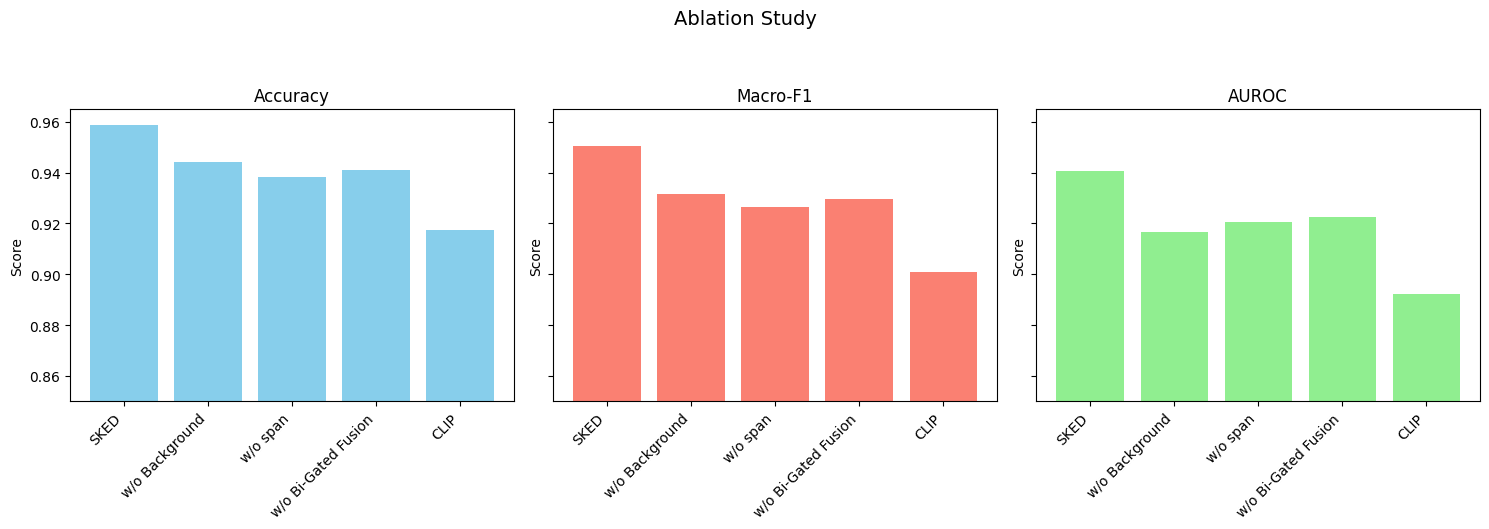

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# 模型表现数据
data = {
    "Model": ["SKED", "w/o Background", "w/o span", "w/o Bi-Gated Fusion", "CLIP"],
    "Accuracy": [0.9588 ,0.9441, 0.9382, 0.9412, 0.9176],
    "Macro-F1": [ 0.9504 ,0.9317, 0.9263, 0.9296, 0.9008],
    "AUROC": [0.9407 ,0.9167, 0.9206, 0.9227, 0.8923]
}

df = pd.DataFrame(data)

# 设置画布
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# 每张图展示一个指标
metrics = ["Accuracy", "Macro-F1", "AUROC"]
colors = ['skyblue', 'salmon', 'lightgreen']

for i, metric in enumerate(metrics):
    axes[i].bar(df["Model"], df[metric], color=colors[i])
    axes[i].set_title(metric)
    axes[i].set_ylim(0.85, 0.965)
    axes[i].set_ylabel("Score")
    axes[i].set_xticklabels(df["Model"], rotation=45, ha="right")

plt.tight_layout()
plt.suptitle("Ablation Study", fontsize=14, y=1.05)
plt.subplots_adjust(top=0.85)

plt.show()


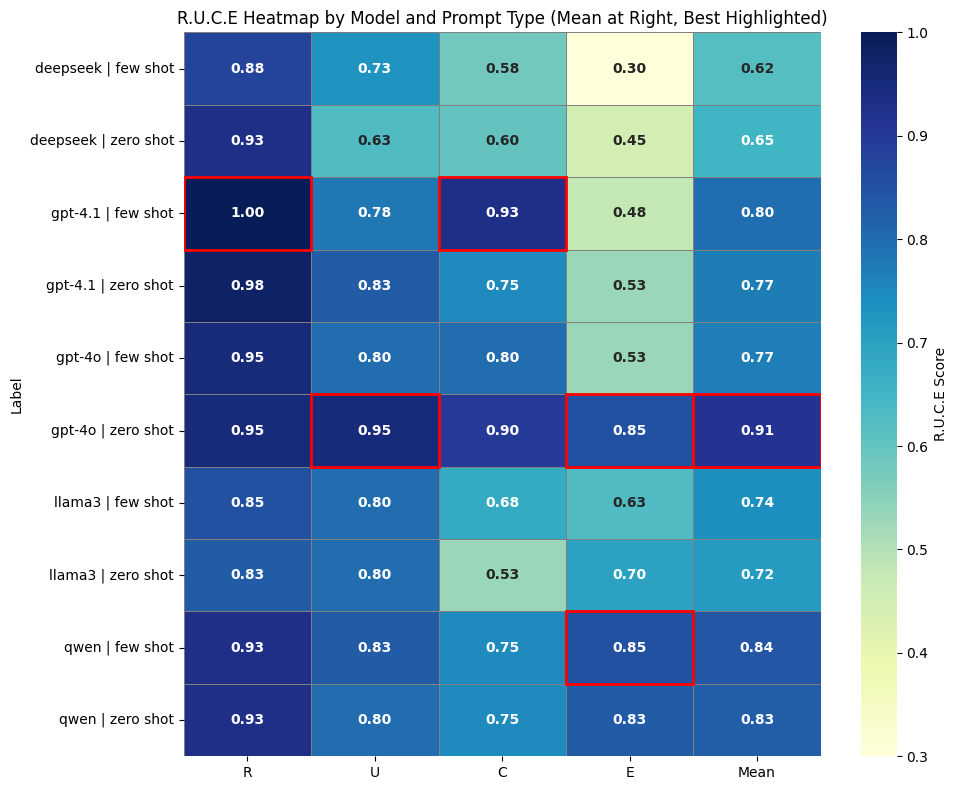

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 原始数据
data = [
    ("deepseek", "few shot", 0.88, 0.73, 0.58, 0.30),
    ("deepseek", "zero shot", 0.93, 0.63, 0.60, 0.45),
    
    ("gpt-4.1", "few shot", 1.00, 0.78, 0.93, 0.48),
    ("gpt-4.1", "zero shot", 0.98, 0.83, 0.75, 0.53),
    
    ("gpt-4o", "few shot", 0.95, 0.80, 0.80, 0.53),
    ("gpt-4o", "zero shot", 0.95, 0.95, 0.90, 0.85),
    
    ("llama3", "few shot", 0.85, 0.80, 0.68, 0.63),
    ("llama3", "zero shot", 0.83, 0.80, 0.53, 0.70),
    
    ("qwen", "few shot", 0.93, 0.83, 0.75, 0.85),
    ("qwen", "zero shot", 0.93, 0.80, 0.75, 0.83),
]

# 创建 DataFrame
df = pd.DataFrame(data, columns=["Model", "Prompt", "R", "U", "C", "E"])
df["Mean"] = df[["R", "U", "C", "E"]].mean(axis=1)
df["Label"] = df["Model"] + " | " + df["Prompt"]

# 重排列顺序并设定索引
heatmap_data = df.set_index("Label")[["R", "U", "C", "E", "Mean"]]

# 行顺序
order = [
    "deepseek | few shot", "deepseek | zero shot",
    "gpt-4.1 | few shot", "gpt-4.1 | zero shot",
    "gpt-4o | few shot", "gpt-4o | zero shot",
    "llama3 | few shot", "llama3 | zero shot",
    "qwen | few shot", "qwen | zero shot"
]
heatmap_data = heatmap_data.reindex(order)

# 找到每列最大值位置，用于高亮
mask = heatmap_data == heatmap_data.max()

# 画图
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlGnBu",
    cbar_kws={"label": "R.U.C.E Score"},
    linewidths=0.5,  # 分割线
    linecolor='gray',
    fmt=".2f",
    annot_kws={"weight": "bold"},
)

# 高亮最大值（加红框）
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        if mask.iloc[i, j]:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2))

plt.title("R.U.C.E Heatmap by Model and Prompt Type (Mean at Right, Best Highlighted)")
plt.tight_layout()
plt.show()


In [2]:
from sklearn.metrics import classification_report

pred = pd.read_csv('predictions.csv')
labels = pd.read_csv('labels.csv')
print(classification_report(labels, pred))

FileNotFoundError: [Errno 2] No such file or directory: 'predictions.csv'

In [9]:
import pandas as pd

In [11]:
df = pd.read_csv('test_results.csv')
y_pred = df['predictions']
y_true = df['labels']

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       236
           1       0.97      0.89      0.93       104

    accuracy                           0.96       340
   macro avg       0.96      0.94      0.95       340
weighted avg       0.96      0.96      0.96       340



Confusion Matrix:
[[233   3]
 [ 11  93]]


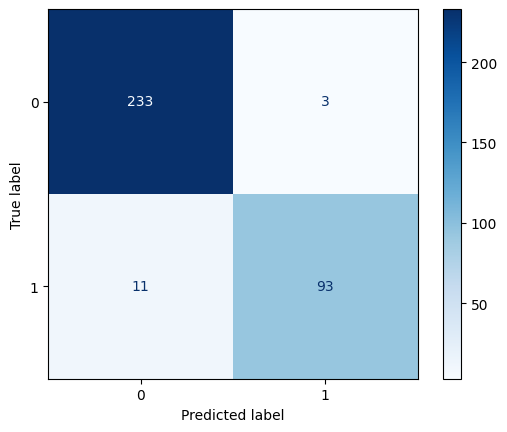

In [ ]:
toxilen_results = pd.read_csv('test_results.csv')
y_pred = toxilen_results['predictions']
y_true = toxilen_results['labels']

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 假设这是你的真实标签和预测标签

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 打印矩阵
print("Confusion Matrix:")
print(cm)

# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # 你也可以换成其他颜色映射
plt.show()


In [1]:
import pandas as pd

In [4]:
cvf_nitt = pd.read_csv("data/workshop/CVF_NITT.csv")
cvf_nitt.rename(columns={"image_name": 'filename'}, inplace=True)
cvf_nitt['predictions'] = cvf_nitt['predictions'].replace({
    'Not-Misogyny': 0,
    'Misogyny': 1
})
ssncse = pd.read_csv("data/workshop/SSNCSE_run1.csv")
ssncse.rename(columns={"id": 'filename'}, inplace=True)

cuet_320 = pd.read_csv("data/workshop/CUET_320_run1.csv", header=None)
cuet_320.columns = ['filename', 'predictions']
cuet_12033 = pd.read_csv("data/workshop/CUET_12033_run1.csv")
cuet_12033.rename(columns={"id": 'filename'}, inplace=True)
cuet_fog = pd.read_csv("data/workshop/CUET_Fog.run1.csv",header=None)
cuet_fog.columns = ['filename', 'predictions']
cuet_ignite = pd.read_csv("data/workshop/CUET_Ignite_run2.csv", header=None)
cuet_ignite.columns = ['filename', 'predictions']
cuet_white_walker = pd.read_csv("data/workshop/CUET_White_Walkers_run2.csv", header=None)
cuet_white_walker.columns = ['filename', 'predictions']
team_l = pd.read_csv("data/workshop/Team_Luminaries_0227_run3.csv", header=None)
team_l.columns = ['filename', 'predictions']


C:\Users\zxj00\AppData\Local\Temp\ipykernel_45888\1803474648.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cvf_nitt['predictions'] = cvf_nitt['predictions'].replace({


In [5]:
dfs = [cuet_320, cuet_12033, cuet_fog, cuet_ignite, cuet_white_walker,  team_l]

In [6]:
for df in dfs:
    df['filename'] = df['filename'].astype(str) + ".jpg"
    

In [ ]:
cvf_nitt

In [12]:
dfs = [
    ("ssncse", ssncse),
    ("cvf_nitt", cvf_nitt),
    ("cuet_320", cuet_320),
    ("cuet_12033", cuet_12033),
    ("cuet_fog", cuet_fog),
    ("cuet_ignite", cuet_ignite),
    ("cuet_white_walker", cuet_white_walker),

]

for name, df in dfs:
    print(f"{name}: {df.shape}")


ssncse: (340, 2)
cvf_nitt: (340, 2)
cuet_320: (340, 2)
cuet_12033: (340, 2)
cuet_fog: (340, 2)
cuet_ignite: (340, 2)
cuet_white_walker: (340, 2)


In [57]:
cvf_nitt = pd.read_csv("CVF_NITT.csv")
cvf_nitt.rename(columns={"image_name": 'filename'}, inplace=True)
cvf_nitt['predictions'] = df['predictions'].replace({
    'Not-Misogyny': 0,
    'Misogyny': 1
})

In [8]:
labels = pd.read_csv("data/cindy/all/test.csv")

In [61]:
merged = pd.merge(cvf_nitt, labels, on='filename', how='left')

In [9]:
from sklearn.metrics import classification_report
print(classification_report(merged['label'], merged['predictions'], digits=4))

NameError: name 'merged' is not defined

In [19]:
merged_df = pd.concat([team_l, labels], axis=1)

In [20]:
print(classification_report(merged_df['label'], merged_df['predictions'], digits=4))

              precision    recall  f1-score   support

           0     0.9444    0.9364    0.9404       236
           1     0.8585    0.8750    0.8667       104

    accuracy                         0.9176       340
   macro avg     0.9015    0.9057    0.9035       340
weighted avg     0.9182    0.9176    0.9179       340



In [13]:
from sklearn.metrics import classification_report
for name, df in dfs:
    merged = pd.merge(df, labels, on='filename', how='left')
    print(f"Results for {name}:")
    print(classification_report(merged['label'], merged['predictions'],digits=4))


Results for ssncse:
              precision    recall  f1-score   support

           0     0.7842    0.9703    0.8674       236
           1     0.8542    0.3942    0.5395       104

    accuracy                         0.7941       340
   macro avg     0.8192    0.6823    0.7034       340
weighted avg     0.8056    0.7941    0.7671       340

Results for cvf_nitt:
              precision    recall  f1-score   support

           0     0.8073    0.9407    0.8689       236
           1     0.7846    0.4904    0.6036       104

    accuracy                         0.8029       340
   macro avg     0.7959    0.7155    0.7362       340
weighted avg     0.8003    0.8029    0.7877       340

Results for cuet_320:
              precision    recall  f1-score   support

           0     0.9538    0.9619    0.9578       236
           1     0.9118    0.8942    0.9029       104

    accuracy                         0.9412       340
   macro avg     0.9328    0.9280    0.9304       340
weighted a

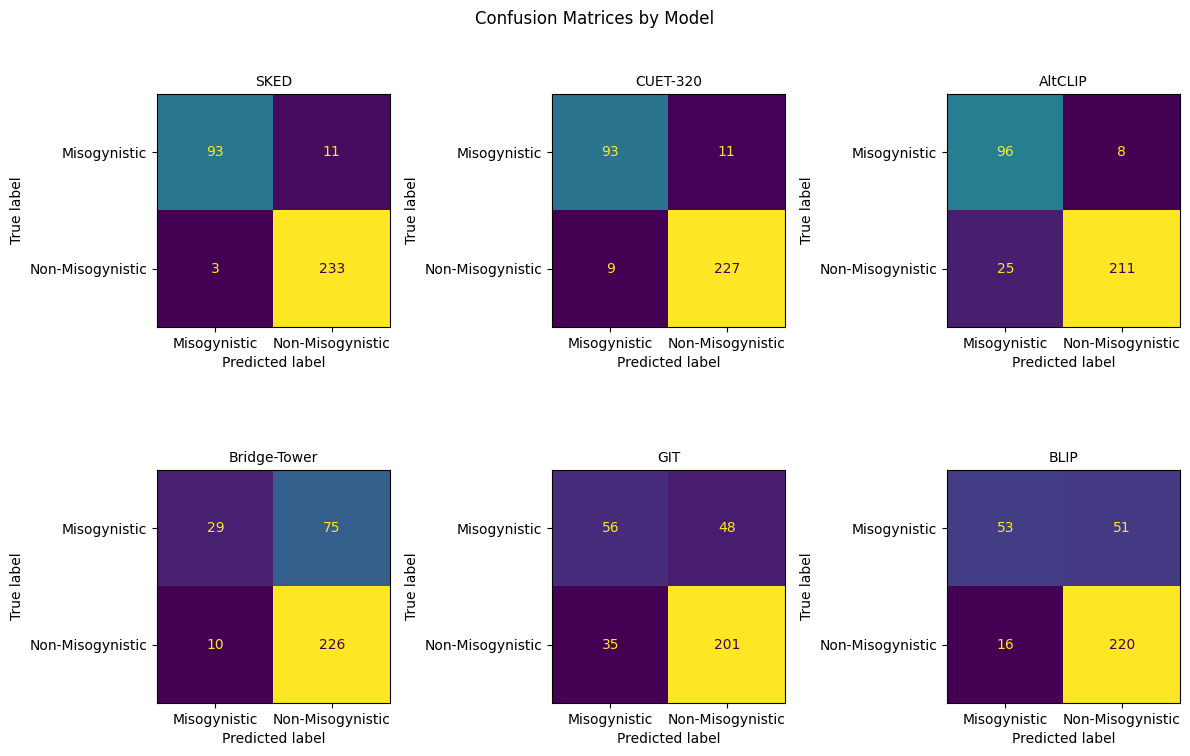

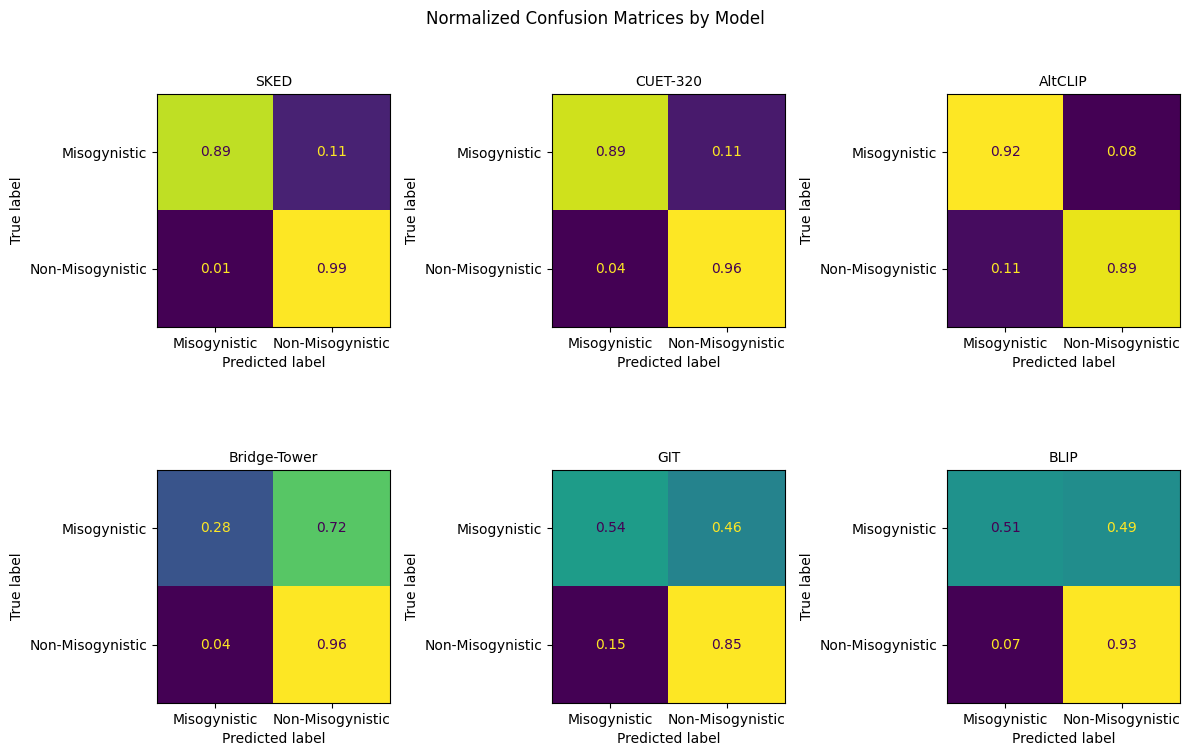

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ===== 基本参数 =====
N_total = 340
N_pos = 104
N_neg = N_total - N_pos
class_names = ["Misogynistic", "Non-Misogynistic"]

# ===== 通过 per-class precision / recall / support 反推混淆矩阵 =====
def cm_from_per_class_metrics(p0, r0, s0, p1, r1, s1):
    TP = int(round(r1 * s1))
    FN = s1 - TP
    FP = int(round(TP / p1 - TP)) if p1 > 0 else 0
    TN = s0 - FP
    return np.array([[TP, FN], [FP, TN]], dtype=int)

# ===== 绘图函数 =====
def plot_many_confusions(cms_dict, normalize=False, title="Confusion Matrices"):
    names = list(cms_dict.keys())
    k = len(names)
    ncols = 3 if k >= 3 else k
    nrows = int(math.ceil(k / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    if k == 1:
        axes = np.array([[axes]])
    elif nrows == 1:
        axes = np.array([axes])

    for i, name in enumerate(names):
        r, c = divmod(i, ncols)
        ax = axes[r, c]
        cm = cms_dict[name]

        if normalize:
            cm_plot = cm.astype(float)
            row_sum = cm_plot.sum(axis=1, keepdims=True)
            cm_plot = cm_plot / np.clip(row_sum, 1, None)
            fmt = ".2f"
        else:
            cm_plot = cm.astype(int)
            fmt = "d"

        disp = ConfusionMatrixDisplay(confusion_matrix=cm_plot, display_labels=class_names)
        disp.plot(ax=ax, colorbar=False, values_format=fmt)
        ax.set_title(name, loc='center', fontsize=10)

    for j in range(k, nrows*ncols):
        r, c = divmod(j, ncols)
        axes[r, c].axis("off")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# ===== 模型 per-class 指标 =====
models_data = {
    "AltCLIP": {"p0": 0.9635, "r0": 0.8941, "s0": N_neg,
                "p1": 0.7934, "r1": 0.9231, "s1": N_pos},
    "Bridge-Tower": {"p0": 0.7508, "r0": 0.9576, "s0": N_neg,
                     "p1": 0.7436, "r1": 0.2788, "s1": N_pos},
    "GIT": {"p0": 0.8072, "r0": 0.9576, "s0": N_neg,
            "p1": 0.6154, "r1": 0.5385, "s1": N_pos},
    "BLIP": {"p0": 0.8118, "r0": 0.9322, "s0": N_neg,
             "p1": 0.7681, "r1": 0.5096, "s1": N_pos}
}

# ===== 组合所有模型的混淆矩阵 =====
cms = {}

# 直接补充你给的 ToxiLEN / CUET-320
cms["SKED"] = np.array([[93, 11], [3, 233]])
cms["CUET-320"] = np.array([[93, 11], [9, 227]])

# 其它模型用 per-class metrics 反推
for name, metr in models_data.items():
    cms[name] = cm_from_per_class_metrics(
        metr["p0"], metr["r0"], metr["s0"],
        metr["p1"], metr["r1"], metr["s1"]
    )

# ===== 绘图 =====
plot_many_confusions(cms, normalize=False, title="Confusion Matrices by Model")
plot_many_confusions(cms, normalize=True, title="Normalized Confusion Matrices by Model")
